# Modelo de clasificación con Random Forest 
## Autora: Sandra Alonso Paz, estudiante del Máster en Biología Computacional.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Importación de los datos
### 1. Importar los datos del CSV

In [2]:
path ='dataset18.csv'
data = pd.read_csv(path)

### 2. Creamos las dos variables que utilizaremos en el modelo
   
    X = Atributos del modelo (columnas del CSV)
    
    Y = Columna target (la que queremos predecir a partir del resto de columnas)

In [3]:
X = data.iloc[:,2:23] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

# Como la columna target esta compuesta por valores categóricos ordinales (R y NR) convertimos en valores numéricos (R=0, NR=1) 
for i in range (len(data)):
    if data.Target[i]=='R': #R
        Y.append(0)
    else:                   #NR
        Y.append(1)


# Creación del modelo de Random Forest
### 1. Separamos el conjunto de datos en entrenamiento y prueba

In [4]:
# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.35, random_state=125)

print('Tamaño del conjunto de entrenamiento:', len(XTrain))
print('Tamaño de la columna objetivo del conjunto de entrenamiento:', len(yTrain))
print('Tamaño del conjunto de prueba:', len(XTest))
print('Tamño de la columna objetivo del conjunto de prueba:', len(yTest))

Tamaño del conjunto de entrenamiento: 34
Tamaño de la columna objetivo del conjunto de entrenamiento: 34
Tamaño del conjunto de prueba: 19
Tamño de la columna objetivo del conjunto de prueba: 19


### 2. Instanciamos un GridSeacrgCV para averiguar que parámetros ajustan mejor el modelo

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# Creamos un GridSearchCV que permite evaluar y seleccionar de forma sistemática los parámetros de nuestro modelo. 
# Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los 
# segundos mediante validación cruzada. 
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=10,
                       random_state=125)


# Cross Validation

In [7]:
print("Mejor resultado de la cross validation del modelo con mejores resultados: " +str(clf.best_score_))

Mejor resultado de la cross validation del modelo con mejores resultados: 0.7380952380952381


# Predicciones y estudio de resultados

In [8]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de entrenamiento
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(len(yTrain)) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Realizamos las predicciones con el modelo óptimo sobre el conjunto de datos de prueba
yhatTest = model.predict(XTest)
contTest = 0

# Comparamos con la columna Target y comprobamos cuantos aciertos ha habido
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [10]:
print('Precisión final en el conjunto de datos de entrenamiento: ' + str(contTrain/len(yTrain)))
print('Precisión final en el conjunto de datos de prueba: ' + str(contTest/len(yTest)))

Precisión final en el conjunto de datos de entrenamiento: 0.9411764705882353
Precisión final en el conjunto de datos de prueba: 0.7894736842105263


# Matriz de confusión
### 1. Matriz de confusión del conjunto de datos del entrenamiento

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Matriz de confusión (Entrenamientos)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Datos de entrada:  ' + str(np.array(yTrain)))
print('Predicción:        ' +str(yhatTrain))

----------------Matriz de confusión (Entrenamientos)------------------
[[13  2]
 [ 0 19]]
Datos de entrada:  [1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1]
Predicción:        [1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 13 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 19 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 2 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, no responderán correctamenteal mismo)
4. 0 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al tratamiento)

### 2. Resultados obtenidos del conjunto de entrenamiento

In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.90      1.00      0.95        19

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.95      0.94      0.94        34



### 3. Matriz de confusión del conjunto de datos de prueba

In [13]:
print('----------------Matriz de confusión (Prueba)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Datos de entrada:  ' + str(np.array(yTest)))
print('Predicción:        ' +str(yhatTest))

----------------Matriz de confusión (Prueba)------------------
[[11  4]
 [ 0  4]]
Datos de entrada:  [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Predicción:        [1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0]


Estos resultados pueden ser interpretados de la siguiente manera:
1. 11 verdaderos positivos (Verdaderamente responderán al tratamiento)
2. 4 verdaderos negativos (Verdaderamente no responderán al tratamiento)
3. 4 falsos positivos (Fueron clasificados como mala respuesta al tratamiento, sin embargo, responderán correctamente al mismo)
4. 0 falsos negativos (Fueron clasificados como buena respuesta al tratamiento, sin embargo, no responderán al tratamiento)

### 4. Resultados obtenidos del conjunto de prueba

In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.50      1.00      0.67         4

    accuracy                           0.79        19
   macro avg       0.75      0.87      0.76        19
weighted avg       0.89      0.79      0.81        19



# Visualización de resultados

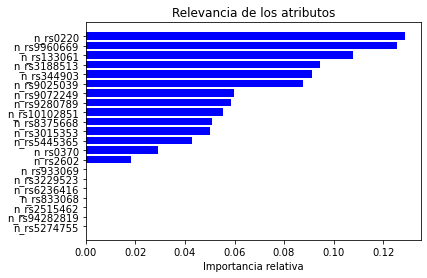

n_rs3188513 = 0.09452656165809639
n_rs9960669 = 0.12546920874092332
n_rs2602 = 0.01808510638297872
n_rs5445365 = 0.04292207092072061
n_rs133061 = 0.10782952776336274
n_rs10102851 = 0.05525191183085918
n_rs8375668 = 0.05092515083306981
n_rs3015353 = 0.050051609979607746
n_rs3229523 = 0.0
n_rs6236416 = 0.0
n_rs5274755 = 0.0
n_rs9280789 = 0.05860771228569388
n_rs2515462 = 0.0
n_rs9025039 = 0.08759545292348477
n_rs94282819 = 0.0
n_rs344903 = 0.09112393209685274
n_rs0370 = 0.02894858303332411
n_rs9072249 = 0.05988351515386857
n_rs0220 = 0.12877965639715744
n_rs833068 = 0.0
n_rs933069 = 0.0


In [15]:
# Mediante el modelo creado podemos ver qué atributos son los más significativos para toamr una decisión.
# Los atributos conmyor relevancia serán los que estén colocados en la cima del árbol.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)
# Los atributos que cuya relevancia es 0, no serán necesarios para realizar la predicción del target.

# Bibliografía

https://www.cienciadedatos.net/documentos/py08_random_forest_python.html

https://machinelearningmastery.com/random-forest-ensemble-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://github.com/ronifernando/KNN-Python-using-Jupyter-Notebook/blob/master/KNN%20Caravan.ipynb

